# Transformações geométricas - APS de Visão

## Criação da imagem

Vamos gerar uma imagem de entrada com algumas coordenadas conhecidas.  Desta seção você só vai precisar das coordenadas dos pontos na imagem de entrada e na imagem de saída

In [5]:
import matplotlib.pyplot as plt

from matplotlib import colors

import cv2

import numpy as np

%matplotlib inline


sp_x = 30
sp_y = 30
x_blocks = 6
y_blocks = 6

In [2]:
# Cria uma imagem RGB  em branco
blank = 255*np.ones((sp_x * x_blocks,sp_y*y_blocks,3), np.uint8)

In [3]:
# Coordenadas de entrada de alguns pontos
points = [[1,1],
          [5,1],
          [1,3],
          [3,3],
          [5,3],
          [1,5],
          [5,5]]

In [4]:
# Cores a usar para os pontos
point_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

## Coordenadas dos pontos na imagem de entrada

Este loop imprime as coordenadas.

As cores dos pontos servem para identificá-los

In [5]:
sp_x = 30 # x spacing
sp_y = 30 # y spacing
point_size = 5
print("Posição dos pontos: (x_entrada, y_entrada)")

for i in range(len(points)):
    point_color = [int(255*canal) for canal in colors.colorConverter.colors[point_colors[i]]]
    point_position = (sp_x*points[i][0], sp_y*points[i][1])
    print(point_position)
    cv2.circle(blank,point_position, point_size, point_color, -1)


Posição dos pontos: (x_entrada, y_entrada)
(30, 30)
(150, 30)
(30, 90)
(90, 90)
(150, 90)
(30, 150)
(150, 150)


## Imagem de entrada

Tudo o que foi geito até agora teve como única finalidade gerar esta imagem, que será gravada no arquivo `dots_pattern.png` .

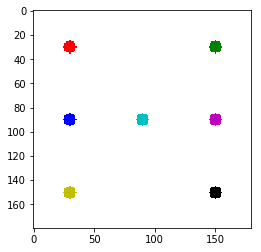

In [6]:
plt.imshow(blank)

Se precisar abrir a imagem fora deste *notebook*, use o arquivo `dots_pattern.png`


In [7]:
cv2.imwrite("dots_pattern.png", blank)

True

## Padrão de saída

Foi aplicada uma transformação à imagem de entrada, que gerou o seguinte padrão de saída:

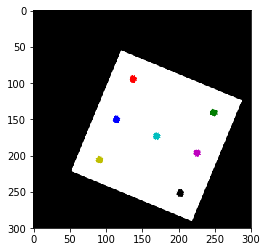

In [8]:
saida = cv2.imread("patterns_transformed.png")

saida_rgb = cv2.cvtColor(saida, cv2.COLOR_BGR2RGB)

plt.imshow(saida)

Sabe-se que a imagem de saída é igual a uma combinação de rotações em torno de um ponto arbitrário e  redimensionamentos (escala) da imagem de entrada. Para simplificar, assuma que o redimensionamento é igual nos eixos $x$ e $y$

Cada ponto da imagem de saída está relacionado à sua posição na imagem de entrada pela seguinte transformação:

$$
\begin{pmatrix}
x_{saida} \\
y_{saida} \\
1
\end{pmatrix}
 = 
\begin{pmatrix}
   \alpha &\beta &(1-\alpha \cdot center.x - \beta \cdot center.y) \\
   -\beta & \alpha & \beta \cdot center.x + (1 - \alpha \cdot center.y) \\ 0 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix} x_{entrada} \\ y_{entrada} \\ 1 \end{pmatrix} 
$$

Na equação acima:

$\alpha = escala \cdot \cos(\theta)$ 

$\beta = escala \cdot \sin(\theta) $ 

$x_{entrada}$ é a posição $x$ de cada pixel na imagem de entrada

$y_{entrada}$ é a posição $y$ de cada pixel na imagem de entrada

$center$ é o centro de rotação

$x_{saída}$ é a coordenada $x$ do pixel na imagem de saída

$y_{saída}$ é a coordenada $y$ do pixel na imagem de saída


Com translação:

$$
\begin{pmatrix}
x_{saida} \\
y_{saida} \\
1
\end{pmatrix}
 =
\begin{pmatrix}
   \alpha &\beta &(1-\alpha \cdot center.x - \beta \cdot center.y) + t_x \\
   -\beta & \alpha & \beta \cdot center.x + (1 - \alpha \cdot center.y) + t_y \\ 0 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix} x_{entrada} \\ y_{entrada} \\ 1 \end{pmatrix}
$$



# Matrizes de transformação com rotação, translação e escala


O objetivo desta seção é só entender a forma da transformação de saída expressa na equação que fecha a seção anterior.

Uma matriz de translação por uma distância $ [ x_t   y_t ]$ em 2D é:

$$
T = \begin{pmatrix} 1 & 0 & x_t \\
0 & 1 & y_t \\
0 & 0 & 1 
\end{pmatrix}
$$

Uma matriz de rotação por um ângulo $\theta$ é:

$$
R = \begin{pmatrix} \cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$

Uma matriz que aplica um fator de escala  $s$ igual nos eixos $x$ e $y$ é:


$$
S = \begin{pmatrix} s & 0  & 0 \\
0 & s & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$


Uma transformação genérica, composta de rotação, escala e transação (nesta ordem) é dada por:

$$
M = T \cdot S \cdot R
$$

Ou seja:
$$
M = \begin{pmatrix} 1 & 0 & x_t \\
0 & 1 & y_t \\
0 & 0 & 1 
\end{pmatrix}
\cdot
\begin{pmatrix} \cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1 
\end{pmatrix}
\cdot
\begin{pmatrix} s & 0  & 0 \\
0 & s & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$

Multiplicando as três matrizes, temos que uma transformação afim composta de rotação, escala e translação é:

$$
M = \begin{pmatrix} s\cdot\cos(\theta) & -s\cdot\sin(\theta) & x_t \\
-s\cdot\sin(\theta) & -s\cdot\cos(\theta) & y_t \\
0 & 0 & 1 
\end{pmatrix}
$$


Desta forma, um ponto de entrada representado por $( x_{i}, y_{i} ) $ será transformado num ponto de saída $(x_{saida}, y_{saida})$ quando multiplicado pela matrix $M$


$$
\begin{pmatrix}x_{saida} \\ y_{saida} \end{pmatrix} = \begin{pmatrix} s\cdot\cos(\theta) & -s\cdot\sin(\theta) & x_t \\
-s\cdot\sin(\theta) & -s\cdot\cos(\theta) & y_t \\
0 & 0 & 1 
\end{pmatrix} \cdot \begin{pmatrix} x_{i} \\ y_{i} \end{pmatrix} 
$$

Teremos, então:

$$
x_{saida} = x_{i} \cdot s \cdot \cos(\theta) - y_{i} \cdot s \cdot \sin(\theta) + x_t $$
e 
$$ y_{saida} = - x_{i} \cdot s \cdot \sin(\theta) - y_{i} \cdot s \cdot \cos(\theta) + y_t
$$

Por simplicidade, ao estimar uma transformação, ajuda trabalhar com as seguintes relações:

$\alpha =  s \cdot \cos(\theta)$

e 

$\beta = s \cdot \sin(\theta) $

E encarar a matriz da seguinte forma:


$$
\begin{pmatrix}x_{saida} \\ y_{saida} \end{pmatrix} = \begin{pmatrix} \alpha & -\beta & x_t \\
-\beta & -\alpha & y_t \\
0 & 0 & 1 
\end{pmatrix} \cdot \begin{pmatrix} x_{i} \\ y_{i} \end{pmatrix} 
$$



# APS Visão

Responda (no IPython Notebook): 

1. Quantos graus de liberdade (variáveis) determinam a transformação acima?

2. Supondo que a transformação aplicada para transformar a imagem de entrada na imagem do arquivo `patterns_transformed.png` é desconhecida, é possível descobrir qual é esta transformação? Como?

3. Crie uma tabela para os 7 pontos de entrada fornecidos em que constem quais suas posições na imagem de entrada e depois quais suas posições após transformados, na imagem de saída.

4. Considerando o número de variáveis da matriz de transformação fornecida, de quantas correspondências $p_{entrada} \Rightarrow p_{saida}$ você precisa para descobrir qual é a matriz?

5. Por que poderia ser útil usar **mais** correspondências do que a resposta que você deu no item anterior?

6. Expanda a equação da transformação usando os pontos de entrada e saída de sua tabela até ter um sistema sobredeterminado. <font color=red> Reserve pelo menos 1 hora para esta atividade - trabalhoso </font>. Talvez você ache útil aprender a usar um *Computer Algebra System* para fazer isso, por exemplo o Sympy ou o Maxima.

7. A partir do sistema sobredeterminado que você encontrou no item anterior, resolva e estime qual é a transformação que foi usada para converter a imagem de entrada na imagem de saída. Você pode usar o método de *Least Squares* que está presente no *Scipy* ou o *RANSAC* da OpenCV, por exemplo.

8. Aplique a transformação à imagem de entrada e verifique se o resultado que obteve se assemelha à imagem de saída. A função da OpenCV que permite que você faça isso é a *cv2.warpAffine()* 

9. Abra a imagem `patterns_transformed.png`  na tela do seu celular e imprima na tela em tempo real a rotação da imagem

### Respostas

1 - 4 variaveis

2 - Sim, é possivel usar a matriz inversa de M para descobrir os valores das variaveis usando algebra linear.

Entrada: [[30, 30], [150, 30], [30, 90], [90, 90], [150, 90], [30, 150], [150, 150]]
Saida: [[138, 95], [248, 141], [114, 150], [169, 172], [225, 197], [91, 207], [202, 252]]


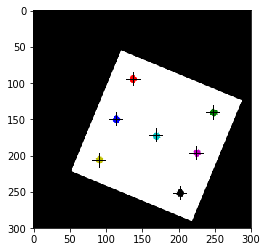

In [9]:
# 3

lists = []
lists2 = []

for i in range(len(points)):
    lists.append([sp_x*points[i][0], sp_y*points[i][1]])

def aim(x,y):
    saida[y-10:y+10,x] = [0,0,0]
    saida[y,x-10:x+10] = [0,0,0]
    lists2.append([x,y])
    
aim(138,95)
aim(248,141)
aim(114,150)
aim(169,172)
aim(225,197)
aim(91,207)
aim(202,252)

plt.imshow(saida)

print('Entrada: '+ str(lists))
print('Saida: '+ str(lists2))

4 - 4 correspondencias.

5 - Por precisão. Como a transformacao pode resultar em valores continuos para as coordenadas de x e y dos novos pontos que seriam ignorados ou arredondados para um inteiro para tornar esses valores discretos, fazer o caminho inverso da saida para encontrar a entrada pode resultar em entradas diferentes das originais. Por isso, quanto mais pontos forem usados, mais seguros podemos estar de que as medias das variaveis da matriz transformacao estão proximas dos valores originais.

In [11]:
# 6

from sympy.solvers import solve
from IPython.core.display import display_pretty
from sympy.printing.latex import *
from sympy import init_printing; init_printing()
from sympy.interactive import printing
printing.init_printing(use_latex=True)
import sympy as sp
from random import randint

iniciais = [[30, 30], [150, 30], [30, 90], [90, 90], [150, 90], [30, 150], [150, 150]]
transformados = [[138, 95], [248, 141], [114, 150], [169, 172], [225, 197], [91, 207], [202, 252]]

def make_column_point(x, y):
    return sp.Matrix([[x],[y],[1]])

def initialpointmaker(num):
    for x in range(0,num + 1):
        a = str(x)
        exec('global x'+a+', y'+a+'; x'+a+', y'+a+'  = sp.symbols("x_'+a+', y_'+a+'")')
        exec('global p'+a+'; p'+a+' = make_column_point(x'+a+', y'+a+')')

def finalpointmaker(num):
    for x in range(0,num + 1):
        a = str(x)
        exec('global xs'+a+', ys'+a+'; xs'+a+', ys'+a+' = sp.symbols("x_s'+a+', y_s'+a+'")')
        exec('global ps'+a+'; ps'+a+' = make_column_point(xs'+a+', ys'+a+')')

# Criar os pontos de acordo com quantos pontos voce precisar ('num')
def pointer(num):
    initialpointmaker(num)
    finalpointmaker(num)
    
    global points_entrada; points_entrada = []
    global points_saida; points_saida = []
        
    for x in range(0,num + 1):
        x = str(x)
        exec('points_entrada.append(p'+x+')')
        exec('points_saida.append(ps'+x+')')

# Simbolos para as equacoes
t_y, t_x, a, b =  sp.symbols("t_y, t_x, a, b")

# Usando o criador de pontos
pointer(6)

# Definindo a matriz generica M
M = sp.Matrix([[a, b, t_x], [-b, a, t_y], [0, 0, 1]])

# Fazendo as equações de acordo com o codigo mostrado em EstudoMatrizesSistemas
############################################################################################################
equations = []
system_eq = [] # Sistema de equações supondo = 0
left_side = [] # Lado esquerdo do sistema

for p in points_entrada:
    produto = M*p
    equations.append(produto)
print("Equacoes genericas para todos os pontos")

for i in range(len(equations)):
    for j in range(len(equations[i][:-1])): # -1 excludes the homogeneous coordinate (extra 1 at the end)
        eq = equations[i][j]-points_saida[i][j]
        left_side.append(equations[i][j])
        system_eq.append(eq)

############################################################################################################        
        
# Substituindo os valores dos meus pontos
############################################################################################################
for equation in system_eq:
    display(equation)

def replacer(eq,idx,vals):
    idx = str(idx/2)
    v0,v1 = vals
    x,y = v0
    xs,ys = v1
    return eq.replace('x_'+idx,x).replace('y_'+idx,y).replace('x_s'+idx,xs).replace('y_s'+idx,ys)

print('equacoes usadas:')
lista = []
for x in range(0,12):
    lista.append(replacer(system_eq[x],x,[iniciais[x/2],transformados[x/2]]))


for equation in lista:
    display(equation)

names = [x for x in solve(lista[0:4],[a,b,t_x,t_y]).keys()]

boots = []

print('Bootstrap de solucoes... voce nao contava com minha astucia, sigam me os bons:')
print('Só serão mostradas as primeiras 4 soluções')

for b in range(0,10000):
    solucoes = []
    jafoi = []
    x = randint(0,8)
    for a in range(0,8,2):
        jafoi.append(x)
        apdict = {}
        res = solve(lista[x:x+4],['a','b','t_x','t_y'])
        if b == 1:
            display(res)
        for y in names:
            apdict[str(y)] = res[y]
        solucoes.append(apdict)
        while x in jafoi:
            x = randint(0,8)
    boots.append(solucoes)

# Médias das medias

a = 0.0
b = 0.0
tx = 0.0
ty = 0.0

for y in boots:
    
    # Médias
    
    aa = 0.0
    ba = 0.0
    txa = 0.0
    tya = 0.0
    
    for x in y:
        aa += x['a']
        ba += x['b']
        txa += x['t_x']
        tya += x['t_y']

    aa /= len(y)
    ba /= len(y)
    txa /= len(y)
    tya /= len(y)

    a += aa
    b += ba
    tx += txa
    ty += tya

a /= len(boots)
b /= len(boots)
tx /= len(boots)
ty /= len(boots)

medias = {'a' : a,
      'b' : b,
      'tx' : tx,
      'ty' : ty}

print('Medias: ' + str(medias))
display(medias)

Equacoes genericas para todos os pontos


equacoes usadas:


Bootstrap de solucoes... voce nao contava com minha astucia, sigam me os bons:
Só serão mostradas as primeiras 4 soluções


Medias: {'a': 0.922248208333338, 'b': -0.386961083333344, 'tx': 121.243871250003, 'ty': 54.9385512500029}


{'a': 0.922248208333338,
 'b': -0.386961083333344,
 'tx': 121.243871250003,
 'ty': 54.9385512500029}

[[  0.9222482  -0.386961  121.2438712]
 [  0.386961    0.9222482  54.9385512]
 [  0.          0.          1.       ]]


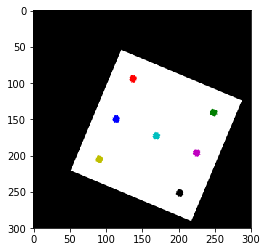

In [10]:
# Escrevendo na mao o resultado por que o python buga quando
# Eu chamo direto na matriz as variaveis a, b, tx, ty
a = 0.9222482
b = -0.3869610
tx = 121.2438712
ty = 54.9385512

# A matriz M original, que nao resulta em uma transformação igual à original
# Note o sinal do primeiro b e segundo a
# M = np.matrix([[a,-b,tx],[-b,-a,ty],[0,0,1]])

# Matriz M que resulta na mesma transformação que a matriz original
M = np.matrix([[a,b,tx],[-b,a,ty],[0,0,1]])
print(M)
use = cv2.imread("dots_pattern.png")
dst1 = cv2.warpPerspective(use,M,(300,300))
plt.imshow(dst1)

# Sinais
Eu devo ter errado algum sinal na conta, por que eu precisei inverter os itens M(0,1) e M(1,1) da matriz M para dar certo a transformação. Uma vez que esses itens foram invertidos, a transformação saiu quase exatamente igual à original (eu, pelo menos nao vejo diferença entre as duas) ... logico, fui eu que fiz.

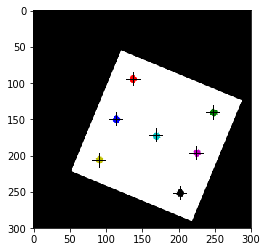

In [11]:
plt.imshow(saida)

[[ 1.00219688e+00 -3.63477488e-01  1.21577162e+02]
 [ 4.29225908e-01  9.93359992e-01  5.42077903e+01]
 [ 2.71524487e-04  3.90007899e-04  1.00000000e+00]]


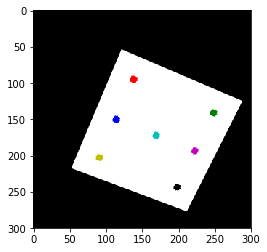

In [12]:
# COMENTARIO
# esse codigo do opencv é pessimo, a minha matriz feita raiz ta mais proxima
# da original...
lists = np.float32(lists[0:4])
lists2 = np.float32(lists2[0:4])

M = cv2.getPerspectiveTransform(lists,lists2)
print(M)
dst = cv2.warpPerspective(use,M,(300,300))


plt.imshow(dst)

## Referências



[Shapiro and Shepard. Computer Vision. Seção 11.2, Capítulo 11](https://courses.cs.washington.edu/courses/cse576/book/ch11.pdf)

[http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html#gsc.tab=0](http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html#gsc.tab=0)



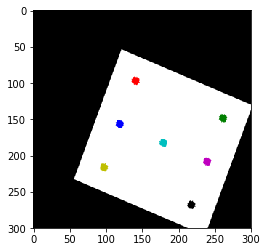

In [13]:
# Zerando os indixes (0,2) e (1,2) pra ver se eu consigo
# Ajudar o opencv...
M[2,0:2] = 0
dst = cv2.warpPerspective(use,M,(300,300))
plt.imshow(dst)

[[   0.92198953    0.38685247 -133.03869363]
 [  -0.38685247    0.92198953   -3.74927842]
 [   0.            0.            1.        ]]


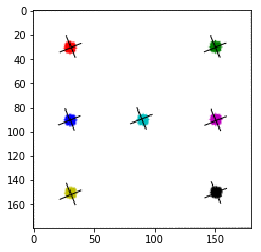

In [14]:
from numpy.linalg import inv

M = inv(np.matrix([[a,b,tx],[-b,a,ty],[0,0,1]]))
print(M)
use = cv2.imread("dots_pattern.png")
dst = cv2.warpPerspective(saida,M,(180,180))
plt.imshow(dst)

<img src="jr.jpg" style="width: 300px;height: 300px">

In [3]:
import cv2
# from cv2 import cv
import numpy as np

use = cv2.imread("dots_pattern.png")
saida = cv2.imread("patterns_transformed.png")

method = cv2.TM_SQDIFF_NORMED
img1 = use

def rectangle(frame):
    result = cv2.matchTemplate(img1, frame, method)

    mn,_,mnLoc,_ = cv2.minMaxLoc(result)

    MPx,MPy = mnLoc

    trows,tcols = img1.shape[:2]

    cv2.rectangle(frame, (MPx,MPy),(MPx+tcols,MPy+trows),(0,0,255),2)

def draw_circle(event,x,y,flags,param):
    global mouseX,mouseY
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(frame,(x,y),100,(255,0,0),-1)
        mouseX,mouseY = x,y

mousex = 0
mousey = 0

frame = saida
        
# frame = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

rectangle(frame)

# while(1):
#     cv2.imshow('image',frame)
    
#     k = cv2.waitKey(0) & 0xFF
    
#     if k == ord('c'):
#         break
#     elif k == ord('a'):
#         print mouseX,mouseY

        
# cap.release()
# cv2.destroyAllWindows()
# cap = cv2.VideoCapture(0)

# plt.imshow(frame)

# cv2.imshow('output',frame)

# cv2.waitKey(0)

In [57]:
frame = cv2.imread("patterns_transformed.png")
method = cv2.TM_SQDIFF_NORMED

def rectangle(frame,dot):
    result = cv2.matchTemplate(dot, frame, method)

    mn,_,mnLoc,_ = cv2.minMaxLoc(result)

    MPx,MPy = mnLoc

    trows,tcols = dot.shape[:2]

    cv2.rectangle(frame, (MPx,MPy),(MPx+tcols,MPy+trows),(0,0,255),2)

red_dot = img1[25:35,25:35]
blue_dot = cv2.cvtColor(img1[85:95,25:35], cv2.COLOR_BGR2RGB)
tan_dot = img1[145:155,25:35]
green_dot = img1[25:35,145:155]
purple_dot = img1[85:95,145:155]
black_dot = img1[145:155,145:155]
cyan_dot = img1[85:95,85:95]

red_dot = cv2.cvtColor(red_dot, cv2.COLOR_BGR2RGB)
tan_dot = cv2.cvtColor(tan_dot, cv2.COLOR_BGR2RGB)
green_dot = cv2.cvtColor(green_dot, cv2.COLOR_BGR2RGB)
purple_dot = cv2.cvtColor(purple_dot, cv2.COLOR_BGR2RGB)
black_dot = cv2.cvtColor(black_dot, cv2.COLOR_BGR2RGB)
cyan_dot = cv2.cvtColor(cyan_dot, cv2.COLOR_BGR2RGB)

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()

#     rectangle(frame,img1)

#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    rectangle(frame,blue_dot)
    rectangle(frame,red_dot)
    rectangle(frame,black_dot)
    
    cv2.imshow('Pure frame com circulos',frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
# plt.imshow(frame)